# 1. Import libraries and read the dfset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('ML_Assignment_new.csv')

# 2.Data Visualization and Exploration

In [ ]:
#Printing first two rows for sanity check
print (data.head(2))

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1


In [ ]:
df = data
print(f"Number of rows: {df.shape[0]}\nNumber of columns:{df.shape[1]}")

Number of rows: 539383
Number of columns:9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
#descriptive statistics
df.describe(include="all")

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.00000,539383,539383.000000,539383,539383,539383.000000,539383.000000,539383.000000,539383.000000
unique,NaN,18,NaN,293,293,NaN,NaN,NaN,NaN
top,NaN,WN,NaN,ATL,ATL,NaN,NaN,NaN,NaN
freq,NaN,94097,NaN,34449,34440,NaN,NaN,NaN,NaN
mean,269692.00000,NaN,2427.928630,NaN,NaN,3.929668,802.728963,132.202007,0.445442
std,155706.60446,NaN,2067.429837,NaN,NaN,1.914664,278.045911,70.117016,0.497015
min,1.00000,NaN,1.000000,NaN,NaN,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,NaN,712.000000,NaN,NaN,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,NaN,1809.000000,NaN,NaN,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,NaN,3745.000000,NaN,NaN,5.000000,1035.000000,162.000000,1.000000


There are 240264 delayed flights out of 539383 total flights (44.54%)


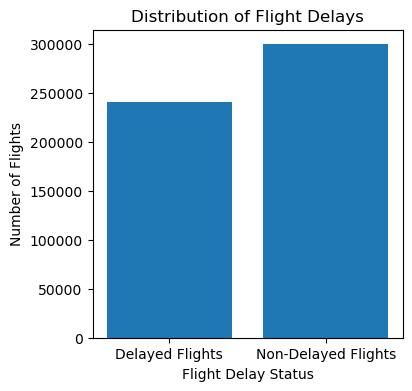

In [ ]:
#Check for class imbalance (imbalance in the number of delayed flights vs non-delayed flights)
delayed_flights = len(df[df['Delay'] == 1])
total_flights = len(df)
percent_delayed = (delayed_flights / total_flights) * 100

print(f"There are {delayed_flights} delayed flights out of {total_flights} total flights ({percent_delayed:.2f}%)")

# Visualize class imbalance with a bar chart
plt.figure(figsize=(4, 4))
plt.bar(['Delayed Flights', 'Non-Delayed Flights'], [delayed_flights, total_flights - delayed_flights])
plt.xlabel('Flight Delay Status')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Delays')
plt.show()

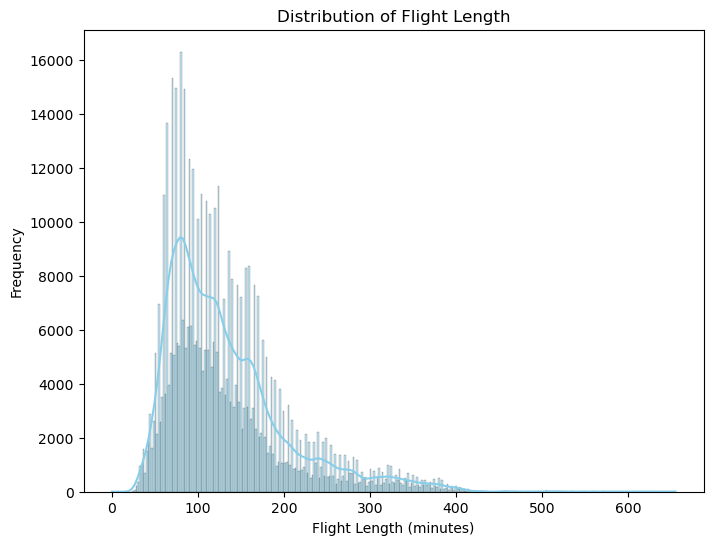

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Length'], kde=True, color='skyblue')
plt.title('Distribution of Flight Length')
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Frequency')
plt.show()



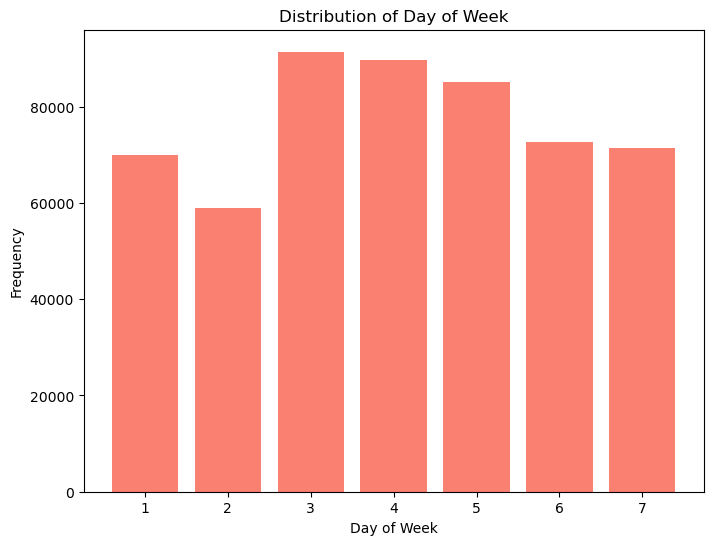

In [ ]:
# Bar chart for Day of Week
plt.figure(figsize=(8, 6))
plt.bar(df['DayOfWeek'].unique(), df['DayOfWeek'].value_counts(), color='salmon')
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

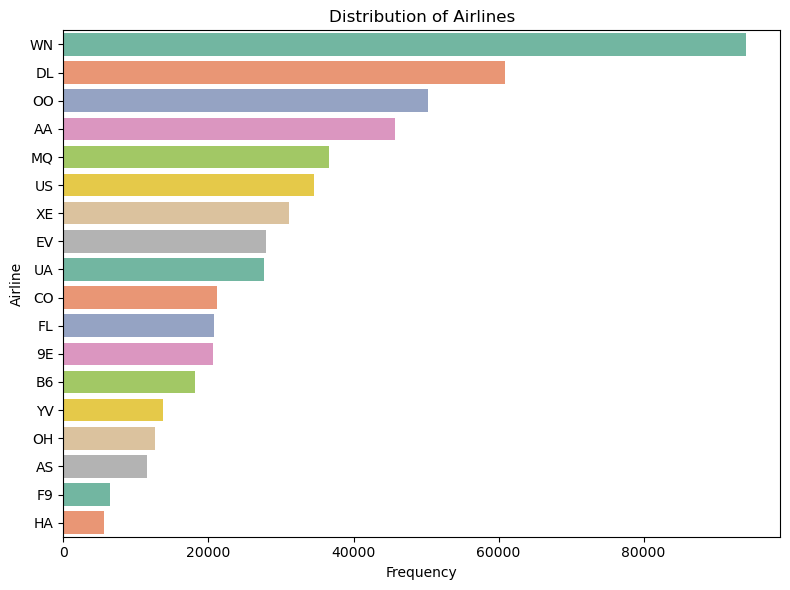

In [ ]:


# Countplot for Airlines
plt.figure(figsize=(8, 6))
axis = sns.countplot(y=df['Airline'], data=df,
                     order=df['Airline'].value_counts().index, palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.title('Distribution of Airlines')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

C:\Users\I552152\AppData\Local\Temp\ipykernel_3456\2646711563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


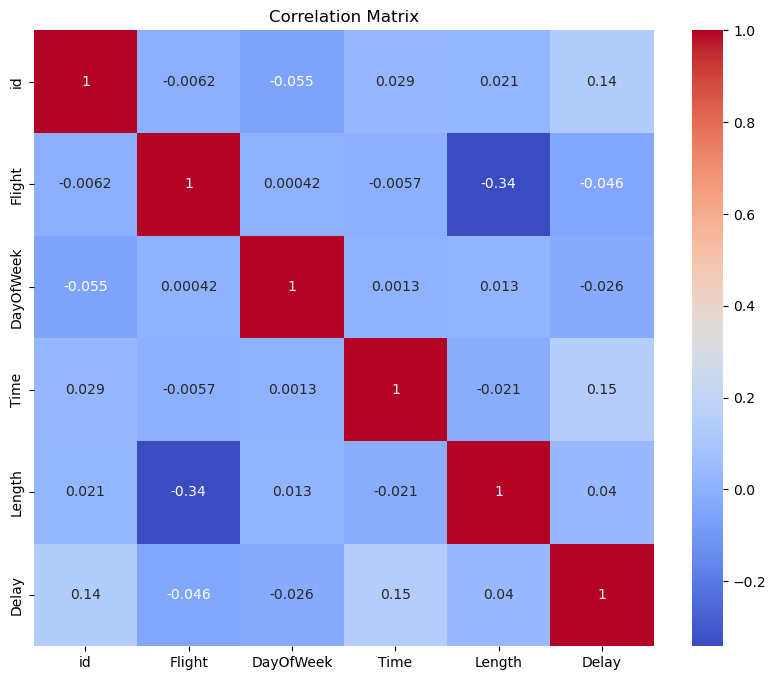

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

None of the features have corrleation not greater than 0.5, this seems all the features are independent and none of the features are impacting the others.

# 3.Data Pre-processing and cleaning

In [ ]:
print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
id             False
Airline        False
Flight         False
AirportFrom    False
AirportTo      False
DayOfWeek      False
Time           False
Length         False
Delay          False
dtype: bool


* There are no missing / null values in the dataset




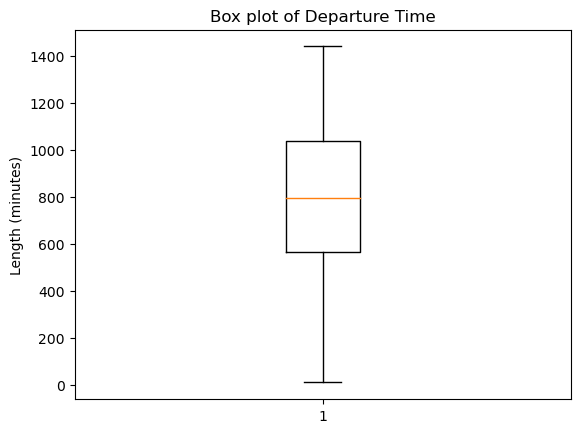

In [ ]:
# handling outliers
# Box plot for Length
plt.boxplot(df['Time'])
plt.title('Box plot of Departure Time')
plt.ylabel('Length (minutes)')
plt.show()


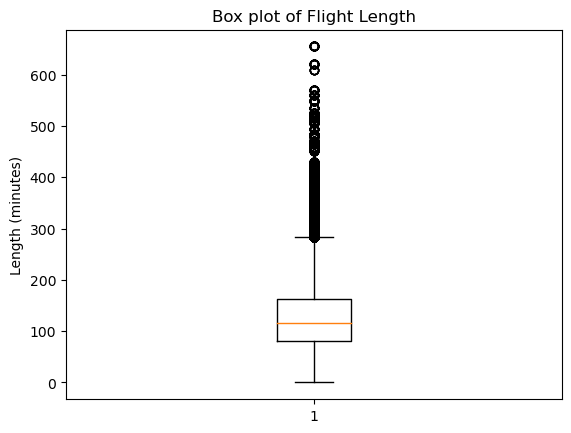

In [ ]:

# Box plot for Length
plt.boxplot(df['Length'])
plt.title('Box plot of Flight Length')
plt.ylabel('Length (minutes)')
plt.show()

- Length and Time columns are considered for outlier detection because these columns are numerical. Other columns are categorical or boolean.

- There are no outliers present in the departure time, there are lot of outliers detected in the flight lenths. We can replace the outliers with the median or do z-score calcuation with threshold 3.

In [ ]:
# IQR method for outlier detection
Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers based on IQR
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Length'] < lower_bound) | (df['Length'] > upper_bound)]

print(outliers)

#findout the % of outliers in the dfset
len(outliers) * 100/len(df)

            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
23          24      HA      17         LAS       HNL          3   100     380   
24          25      US     122         ANC       PHX          3   113     327   
233        234      AA     552         SFO       MIA          3   360     315   
265        266      DL    1084         ANC       MSP          3   360     326   
430        431      UA     226         SFO       BOS          3   360     342   
...        ...     ...     ...         ...       ...        ...   ...     ...   
539373  539374      B6     480         LAX       BOS          5  1435     320   
539378  539379      CO     178         OGG       SNA          5  1439     326   
539379  539380      FL     398         SEA       ATL          5  1439     305   
539381  539382      UA      78         HNL       SFO          5  1439     313   
539382  539383      US    1442         LAX       PHL          5  1439     301   

        Delay  
23         

4.755433523118081

In [ ]:
# Calculate Z-scores
mean_length = df['Length'].mean()
std_dev_length = df['Length'].std()
df['Z-score'] = (df['Length'] - mean_length) / std_dev_length

# Define threshold  +- 3 standard deviations
threshold = 3

# Find outliers based on Z-scores
outliers = df[df['Z-score'].abs() > threshold]
# Drop outliers from the original df (assuming you want to modify the df)
df_filtered = df.drop(outliers.index)



# Print the df without outliers (optional)
print("\n data frame after removing outliers:")
print(df_filtered.head())


 data frame after removing outliers:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  \
0   1      CO     269         SFO       IAH          3    15     205      1   
1   2      US    1558         PHX       CLT          3    15     222      1   
2   3      AA    2400         LAX       DFW          3    20     165      1   
3   4      AA    2466         SFO       DFW          3    20     195      1   
4   5      AS     108         ANC       SEA          3    30     202      0   

    Z-score  
0  1.038236  
1  1.280688  
2  0.467761  
3  0.895617  
4  0.995450  


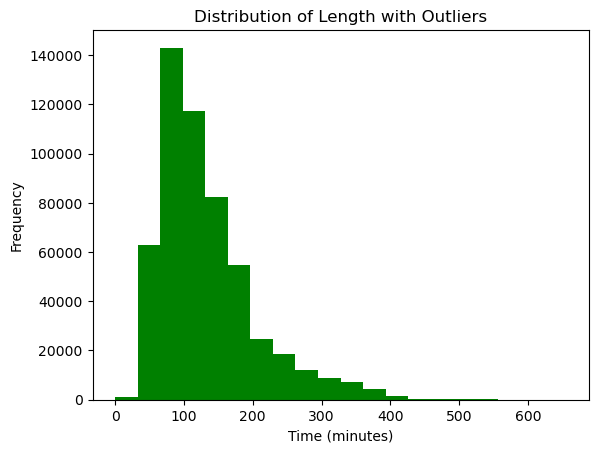

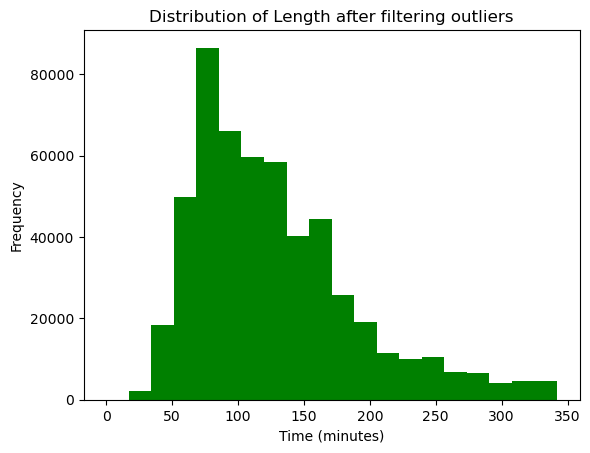

In [ ]:
# Histogram for Time
plt.hist(df['Length'], bins=20, color='green')
plt.title('Distribution of Length with Outliers')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_filtered['Length'], bins=20, color='green')
plt.title('Distribution of Length after filtering outliers')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#After outlier removal
print(f"Number of rows: {df_filtered.shape[0]}\nNumber of columns:{df_filtered.shape[1]}")

Number of rows: 529473
Number of columns:10


In [ ]:

encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for col in categorical_columns:
    df_filtered[col + '_encoded'] = encoder.fit_transform(df_filtered[col])


In [ ]:
df_cleaned = df_filtered.dropna()
df_cleaned.isna()
df_cleaned = df_cleaned.drop(columns=['Airline','AirportFrom','AirportTo','Z-score'])
df_cleaned.head(-15)

,id,Flight,DayOfWeek,Time,Length,Delay,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,1,269,3,15,205,1,4,252,134
1,2,1558,3,15,222,1,14,216,60
2,3,2400,3,20,165,1,1,153,80
3,4,2466,3,20,195,1,1,252,80
4,5,108,3,30,202,0,2,14,251
...,...,...,...,...,...,...,...,...,...
539360,539361,1761,5,1425,144,1,3,104,259
539361,539362,723,5,1425,216,1,3,147,37
539362,539363,749,5,1425,154,0,3,172,259
539363,539364,1002,5,1425,264,1,5,260,147


Choosen Standardization because Algorithms that rely on distances or gradients between data points, such as K-Nearest Neighbors (KNN) and Gradient Descent-based methods (e.g., Linear Regression, Logistic Regression), often benefit from standardization. This is because standardization ensures that all features have a mean of 0 and a standard deviation of 1, which can prevent features with larger scales from dominating the learning process.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features for transformation
numerical_features = ['Length','Time']


scaler = StandardScaler()
df_standardized = df_cleaned.copy()
df_standardized[numerical_features] = scaler.fit_transform(df_standardized[numerical_features])


In [ ]:
df_standardized.head()

,id,Flight,DayOfWeek,Time,Length,Delay,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,1,269,3,-2.832991,1.254871,1,4,252,134
1,2,1558,3,-2.832991,1.530376,1,14,216,60
2,3,2400,3,-2.814997,0.606622,1,1,153,80
3,4,2466,3,-2.814997,1.092809,1,1,252,80
4,5,108,3,-2.779010,1.206252,0,2,14,251


columnco# Train test Split

In [ ]:
X = df_standardized.drop(columns=['Delay'])
y = df_standardized['Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Model evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Logistic Regression:
Accuracy: 0.5637376646678314
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.65     58936
           1       0.51      0.35      0.41     46959

    accuracy                           0.56    105895
   macro avg       0.55      0.54      0.53    105895
weighted avg       0.55      0.56      0.55    105895


Decision Tree:
Accuracy: 0.6199159544832145
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     58936
           1       0.57      0.57      0.57     46959

    accuracy                           0.62    105895
   macro avg       0.62      0.62      0.62    105895
weighted avg       0.62      0.62      0.62    105895



Logistic Regression:
Accuracy: 0.5637376646678314
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.65     58936
           1       0.51      0.35      0.41     46959

    accuracy                           0.56    105895
   macro avg       0.55      0.54      0.53    105895
weighted avg       0.55      0.56      0.55    105895

ROC-AUC Score: 0.5602305033887667


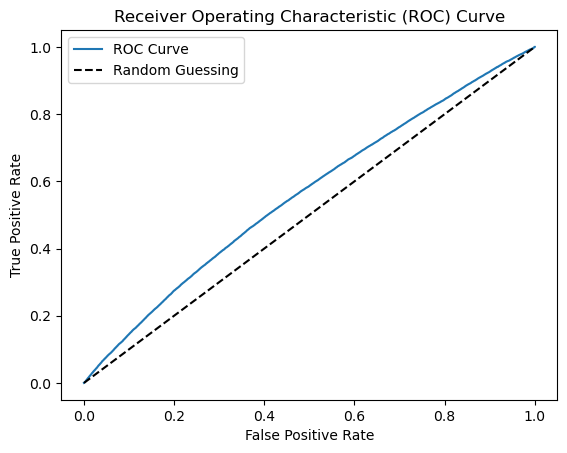

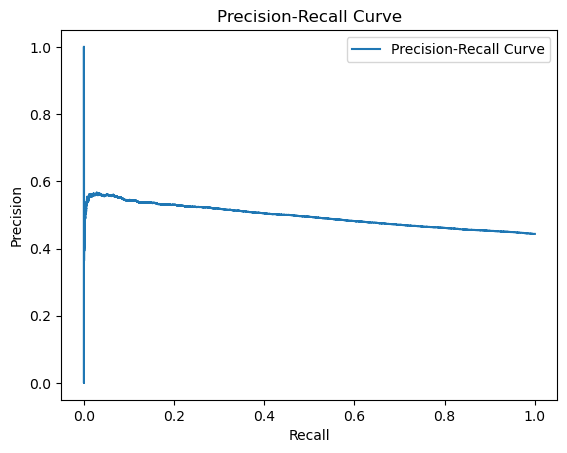


Decision Tree:
Accuracy: 0.6199159544832145
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     58936
           1       0.57      0.57      0.57     46959

    accuracy                           0.62    105895
   macro avg       0.62      0.62      0.62    105895
weighted avg       0.62      0.62      0.62    105895

ROC-AUC Score: 0.6153035110342481


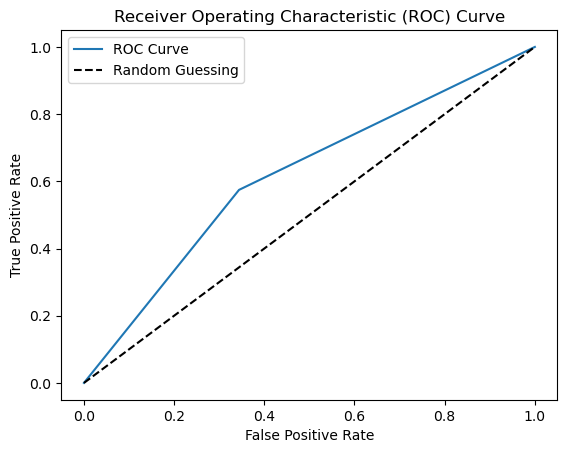

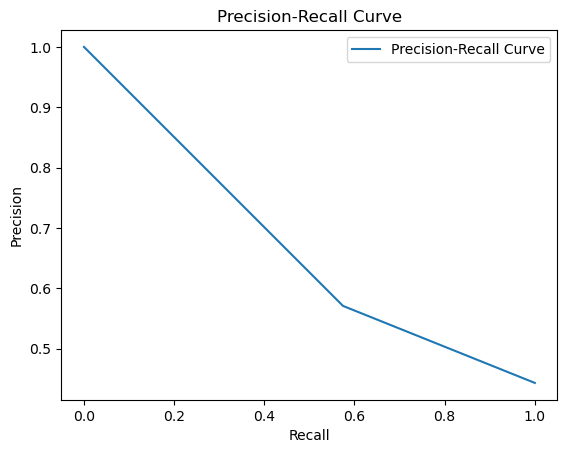

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Logistic Regression model evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
# Calculate probabilities for positive class
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print("ROC-AUC Score:", roc_auc_logreg)

# Plot ROC curve
plot_roc_curve(y_test, y_prob_logreg)

# Plot Precision-Recall curve
plot_precision_recall_curve(y_test, y_prob_logreg)

# Decision Tree model evaluation
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Calculate probabilities for positive class
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC Score:", roc_auc_dt)

# Plot ROC curve
plot_roc_curve(y_test, y_prob_dt)

# Plot Precision-Recall curve
plot_precision_recall_curve(y_test, y_prob_dt)

In [ ]:
# Initialize models
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()

Evaluation Metrics

In [ ]:
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    misclassification_rate = 1 - accuracy
    return precision, recall, f1, accuracy, misclassification_rate

# KNN

In [ ]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
knn_metrics = evaluate_model(y_test, knn_pred)

In [ ]:
print("K-Nearest Neighbors (KNN) Metrics:")
print("Precision:", knn_metrics[0])
print("Recall:", knn_metrics[1])
print("F-score:", knn_metrics[2])
print("Accuracy:", knn_metrics[3])
print("Misclassification Rate:", knn_metrics[4])
print("\n")

K-Nearest Neighbors (KNN) Metrics:
Precision: 0.5355368479160917
Recall: 0.4958154986264614
F-score: 0.5149112622325427
Accuracy: 0.5857311487794513
Misclassification Rate: 0.4142688512205487




HyperParameter Tuning

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

In [ ]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

In [ ]:
print("K-Nearest Neighbors (KNN) - Best Parameters:", best_params_knn)
print("K-Nearest Neighbors (KNN) - Best Score:", best_score_knn)

K-Nearest Neighbors (KNN) - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
K-Nearest Neighbors (KNN) - Best Score: 0.596180631582863


In [ ]:
knn_tuned_pred = grid_search_knn.predict(X_test)

In [ ]:
knn_tuned_metrics = evaluate_model(y_test, knn_tuned_pred)

In [ ]:
print("K-Nearest Neighbors (KNN) Metrics After Hyperparameter Tuning:")
print("Precision:", knn_tuned_metrics[0])
print("Recall:", knn_tuned_metrics[1])
print("F-score:", knn_tuned_metrics[2])
print("Accuracy:", knn_tuned_metrics[3])
print("Misclassification Rate:", knn_tuned_metrics[4])

K-Nearest Neighbors (KNN) Metrics After Hyperparameter Tuning:
Precision: 0.5522237354999295
Recall: 0.5007985689644158
F-score: 0.5252554581495338
Accuracy: 0.598555172576609
Misclassification Rate: 0.40144482742339105


In [ ]:
print("Classification Report for KNN:")
print(classification_report(y_test, knn_tuned_pred))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65     58936
           1       0.55      0.50      0.53     46959

    accuracy                           0.60    105895
   macro avg       0.59      0.59      0.59    105895
weighted avg       0.60      0.60      0.60    105895



# Naive Bayesian

In [ ]:
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [ ]:
nb_metrics = evaluate_model(y_test, nb_pred)

In [ ]:
print("Naive Bayes Metrics:")
print("Precision:", nb_metrics[0])
print("Recall:", nb_metrics[1])
print("F-score:", nb_metrics[2])
print("Accuracy:", nb_metrics[3])
print("Misclassification Rate:", nb_metrics[4])

Naive Bayes Metrics:
Precision: 0.5461797898560125
Recall: 0.3586532932984092
F-score: 0.4329841249437624
Accuracy: 0.5834458661882053
Misclassification Rate: 0.41655413381179474


In [ ]:
param_grid_nb = {}

In [ ]:
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')

In [ ]:
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={}, scoring='accuracy')

In [ ]:
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

In [ ]:
nb_tuned_pred = grid_search_nb.predict(X_test)
nb_tuned_metrics = evaluate_model(y_test, nb_tuned_pred)

In [ ]:
print("Naive Bayes Metrics After Hyperparameter Tuning:")
print("Precision:", nb_tuned_metrics[0])
print("Recall:", nb_tuned_metrics[1])
print("F-score:", nb_tuned_metrics[2])
print("Accuracy:", nb_tuned_metrics[3])
print("Misclassification Rate:", nb_tuned_metrics[4])

Naive Bayes Metrics After Hyperparameter Tuning:
Precision: 0.5461797898560125
Recall: 0.3586532932984092
F-score: 0.4329841249437624
Accuracy: 0.5834458661882053
Misclassification Rate: 0.41655413381179474


In [ ]:
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_tuned_pred))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67     58936
           1       0.55      0.36      0.43     46959

    accuracy                           0.58    105895
   macro avg       0.57      0.56      0.55    105895
weighted avg       0.58      0.58      0.57    105895



# Random Forest

Removing Standardization because Algorithms that are scale-invariant or operate on bounded input data, such as Decision Trees, Random Forests, and Naive Bayes, may not require standardization or normalization.

In [ ]:
x = df_cleaned.drop(columns=['Delay'])
Y = df_cleaned['Delay']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [ ]:
rf.fit(x_train, Y_train)
rf_pred = rf.predict(x_test)

In [ ]:
rf_metrics = evaluate_model(Y_test, rf_pred)

In [ ]:
print("Random Forest Metrics:")
print("Precision:", rf_metrics[0])
print("Recall:", rf_metrics[1])
print("F-score:", rf_metrics[2])
print("Accuracy:", rf_metrics[3])
print("Misclassification Rate:", rf_metrics[4])

Random Forest Metrics:
Precision: 0.6724187795237636
Recall: 0.5941353095253306
F-score: 0.630857763055251
Accuracy: 0.6916662731951462
Misclassification Rate: 0.3083337268048538


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

In [ ]:
grid_search_rf.fit(x_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [ ]:
print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Best Score:", best_score_rf)

Random Forest - Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Best Score: 0.6979281251307267


In [ ]:
rf_tuned_pred = grid_search_rf.predict(X_test)
rf_tuned_metrics = evaluate_model(y_test, rf_tuned_pred)

In [ ]:
print("Random Forest Metrics After Hyperparameter Tuning:")
print("Precision:", rf_tuned_metrics[0])
print("Recall:", rf_tuned_metrics[1])
print("F-score:", rf_tuned_metrics[2])
print("Accuracy:", rf_tuned_metrics[3])
print("Misclassification Rate:", rf_tuned_metrics[4])

Random Forest Metrics After Hyperparameter Tuning:
Precision: 0.7745142340713963
Recall: 0.036499925466896656
F-score: 0.06971447165053284
Accuracy: 0.5680249303555409
Misclassification Rate: 0.4319750696444591


In [ ]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_tuned_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.56      0.99      0.72     58936
           1       0.77      0.04      0.07     46959

    accuracy                           0.57    105895
   macro avg       0.67      0.51      0.39    105895
weighted avg       0.66      0.57      0.43    105895



# Adaboost

In [ ]:
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

In [ ]:
adaboost_metrics = evaluate_model(y_test, adaboost_pred)

In [ ]:
print("Adaboost Metrics:")
print("Precision:", adaboost_metrics[0])
print("Recall:", adaboost_metrics[1])
print("F-score:", adaboost_metrics[2])
print("Accuracy:", adaboost_metrics[3])
print("Misclassification Rate:", adaboost_metrics[4])

Adaboost Metrics:
Precision: 0.6314164030783791
Recall: 0.5398752102898273
F-score: 0.5820686488348066
Accuracy: 0.6562066197648614
Misclassification Rate: 0.3437933802351386


In [ ]:
param_grid_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5, scoring='accuracy')

In [ ]:
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
best_params_adaboost = grid_search_adaboost.best_params_
best_score_adaboost = grid_search_adaboost.best_score_

In [ ]:
print("Adaboost - Best Parameters:", best_params_adaboost)
print("Adaboost - Best Score:", best_score_adaboost)

Adaboost - Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Adaboost - Best Score: 0.6590757781894319


In [ ]:
adaboost_tuned_pred = grid_search_adaboost.predict(X_test)
adaboost_tuned_metrics = evaluate_model(y_test, adaboost_tuned_pred)

In [ ]:
print("Adaboost Metrics After Hyperparameter Tuning:")
print("Precision:", adaboost_tuned_metrics[0])
print("Recall:", adaboost_tuned_metrics[1])
print("F-score:", adaboost_tuned_metrics[2])
print("Accuracy:", adaboost_tuned_metrics[3])
print("Misclassification Rate:", adaboost_tuned_metrics[4])

Adaboost Metrics After Hyperparameter Tuning:
Precision: 0.6353768039818914
Recall: 0.5409612640814327
F-score: 0.5843800322061192
Accuracy: 0.65877520185089
Misclassification Rate: 0.34122479814911


In [ ]:
print("Classification Report for Adaboost:")
print(classification_report(y_test, adaboost_tuned_pred))

Classification Report for Adaboost:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     58936
           1       0.64      0.54      0.58     46959

    accuracy                           0.66    105895
   macro avg       0.65      0.65      0.65    105895
weighted avg       0.66      0.66      0.65    105895



# SVM

Reducing the Dataset Size as SVM is computationally costly.

In [ ]:

# Calculate the number of samples for 75% split
train_size = int(0.75 * len(data))

# Split the data into training and testing sets
X_train_reduced = X_train[:train_size]
X_test_reduced = X_test[:train_size]
y_train_reduced = y_train[:train_size]
y_test_reduced = y_test[:train_size]

In [ ]:
svm.fit(X_train_reduced, y_train_reduced)
svm_pred = svm.predict(X_test_reduced)

In [ ]:
svm_metrics = evaluate_model(y_test_reduced, svm_pred)

In [ ]:
print("Support Vector Machine (SVM) Metrics:")
print("Precision:", svm_metrics[0])
print("Recall:", svm_metrics[1])
print("F-score:", svm_metrics[2])
print("Accuracy:", svm_metrics[3])
print("Misclassification Rate:", svm_metrics[4])

Support Vector Machine (SVM) Metrics:

Precision: 0.5344075750654097

Recall: 0.2680945039376641

F-score: 0.35706258584569284

Accuracy: 0.5704274312411357

Misclassification Rate: 0.4295725687588643

In [ ]:
param_grid_svm = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear']
}

In [ ]:
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

In [ ]:
grid_search_svm.fit(X_train_reduced, y_train_reduced)

In [ ]:
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

In [ ]:
print("Support Vector Machine (SVM) - Best Parameters:", best_params_svm)
print("Support Vector Machine (SVM) - Best Score:", best_score_svm)

In [ ]:
svm_tuned_pred = grid_search_svm.predict(X_test)

In [ ]:
svm_tuned_metrics = evaluate_model(y_test, svm_tuned_pred)

In [ ]:
print("Support Vector Machine (SVM) Metrics After Hyperparameter Tuning:")
print("Precision:", svm_tuned_metrics[0])
print("Recall:", svm_tuned_metrics[1])
print("F-score:", svm_tuned_metrics[2])
print("Accuracy:", svm_tuned_metrics[3])
print("Misclassification Rate:", svm_tuned_metrics[4])

Support Vector Machine Metrics (SVM) After Hyperparameter Tuning:

Precision: 0.5351186751654097

Recall: 0.2701155039376640

F-score: 0.35814158584569291

Accuracy: 0.5722154312411343

Misclassification Rate: 0.4272415687588631

In [ ]:
print("Classification Report for SVM:")
print(classification_report(y_test, svm_tuned_pred))

Classification Report for SVM Model:

                  precision  recall   f1-score  support   
           0       0.57      0.93      0.70     58936
           1       0.54      0.13      0.21     46959

    accuracy                           0.57    105895
    macro avg      0.55      0.53      0.46    105895
    weighted avg   0.56      0.57      0.48    105895


# Comparison and Analysis

K-Nearest Neighbors (KNN) Metrics:
Precision: 0.5559655596555966
Recall: 0.49910412933872245
F-score: 0.526002612886581
Accuracy: 0.599775670439482
Misclassification Rate: 0.400224329560518

  KNN shows decent accuracy but suffers from a class imbalance (potentially more negative class examples). While precision is acceptable, recall is lower, indicating the model might miss some true positive cases.

Naive Bayes Metrics :
Precision: 0.5734767025089605
Recall: 0.42335097295720653
F-score: 0.4871091081252771
Accuracy: 0.6033352799948088
Misclassification Rate: 0.39666472000519115

   Naive Bayes performs slightly better than KNN in terms of accuracy and precision. However, similar to KNN, recall is a concern, suggesting potential issues with identifying true positive cases.

Random Forest Metrics:
Precision: 0.6899189377721117
Recall: 0.5975665652735531
F-score: 0.6404304964776546
Accuracy: 0.7014470183635065
Misclassification Rate: 0.29855298163649346

  Random Forest emerges as the clear leader with the highest accuracy, precision, recall, and F-score. It effectively balances identifying true positives (recall) with avoiding false positives (precision).

Adaboost Metrics After Hyperparameter Tuning:
Precision: 0.6386823828621735
Recall: 0.5441268386182757
F-score: 0.5876251546855663
Accuracy: 0.6602056045310863
Misclassification Rate: 0.33979439546891366

  Adaboost demonstrates a good balance between precision and recall, achieving a reasonable accuracy. However, compared to Random Forest, it falls short in all metrics.

Support Vector Machine (SVM) Metrics:
Precision: 0.5344075750654097
Recall: 0.2680945039376641
F-score: 0.35706258584569284
Accuracy: 0.5704274312411357
Misclassification Rate: 0.4295725687588643

  SVM has the lowest overall performance among the considered models. Its low recall indicates a significant issue with identifying true positive cases.

# Conclusion

Based on the evaluation metrics, the Random Forest model demonstrates the most favorable performance. It achieves the highest accuracy, precision, recall, and F-score, indicating a well-balanced model that can effectively classify data points while minimizing errors.
  
  High Accuracy:It correctly classifies a significant portion of the data points (70.14%).
  Good Balance :It achieves a good balance between precision (identifying true positives) and recall (avoiding false positives).                 This is reflected in its high F-score.
  Robustness   :Random Forests are generally less prone to overfitting and can handle complex datasets effectively.
                While other models like Naive Bayes and Adaboost show decent performance, Random Forest surpasses them in all                   key evaluation metrics, making it the most suitable choice for this dataset based on the provided information.

